In [24]:
#https://www.kaggle.com/gcmadhan/unsupervised-learning-countries-need-finance/data
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [42]:
df = pd.read_csv("C:\\Users\\Delta\\Downloads\\archive (1)\\Country-data.csv")
print(df.shape)
df.head()
xc = df['country']

(167, 10)


In [48]:
df[df['gdpp']>=10000]['country'].count()

57

In [49]:
df[df['gdpp']<=10000]['country'].count()

110

In [50]:
df = df.drop(columns=['country'])

<AxesSubplot:>

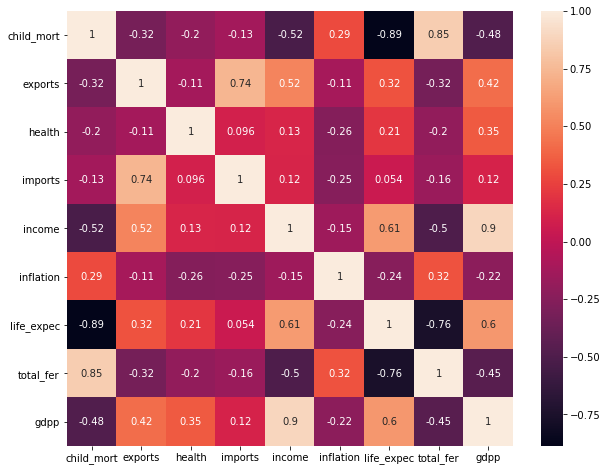

In [51]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(), annot=True)

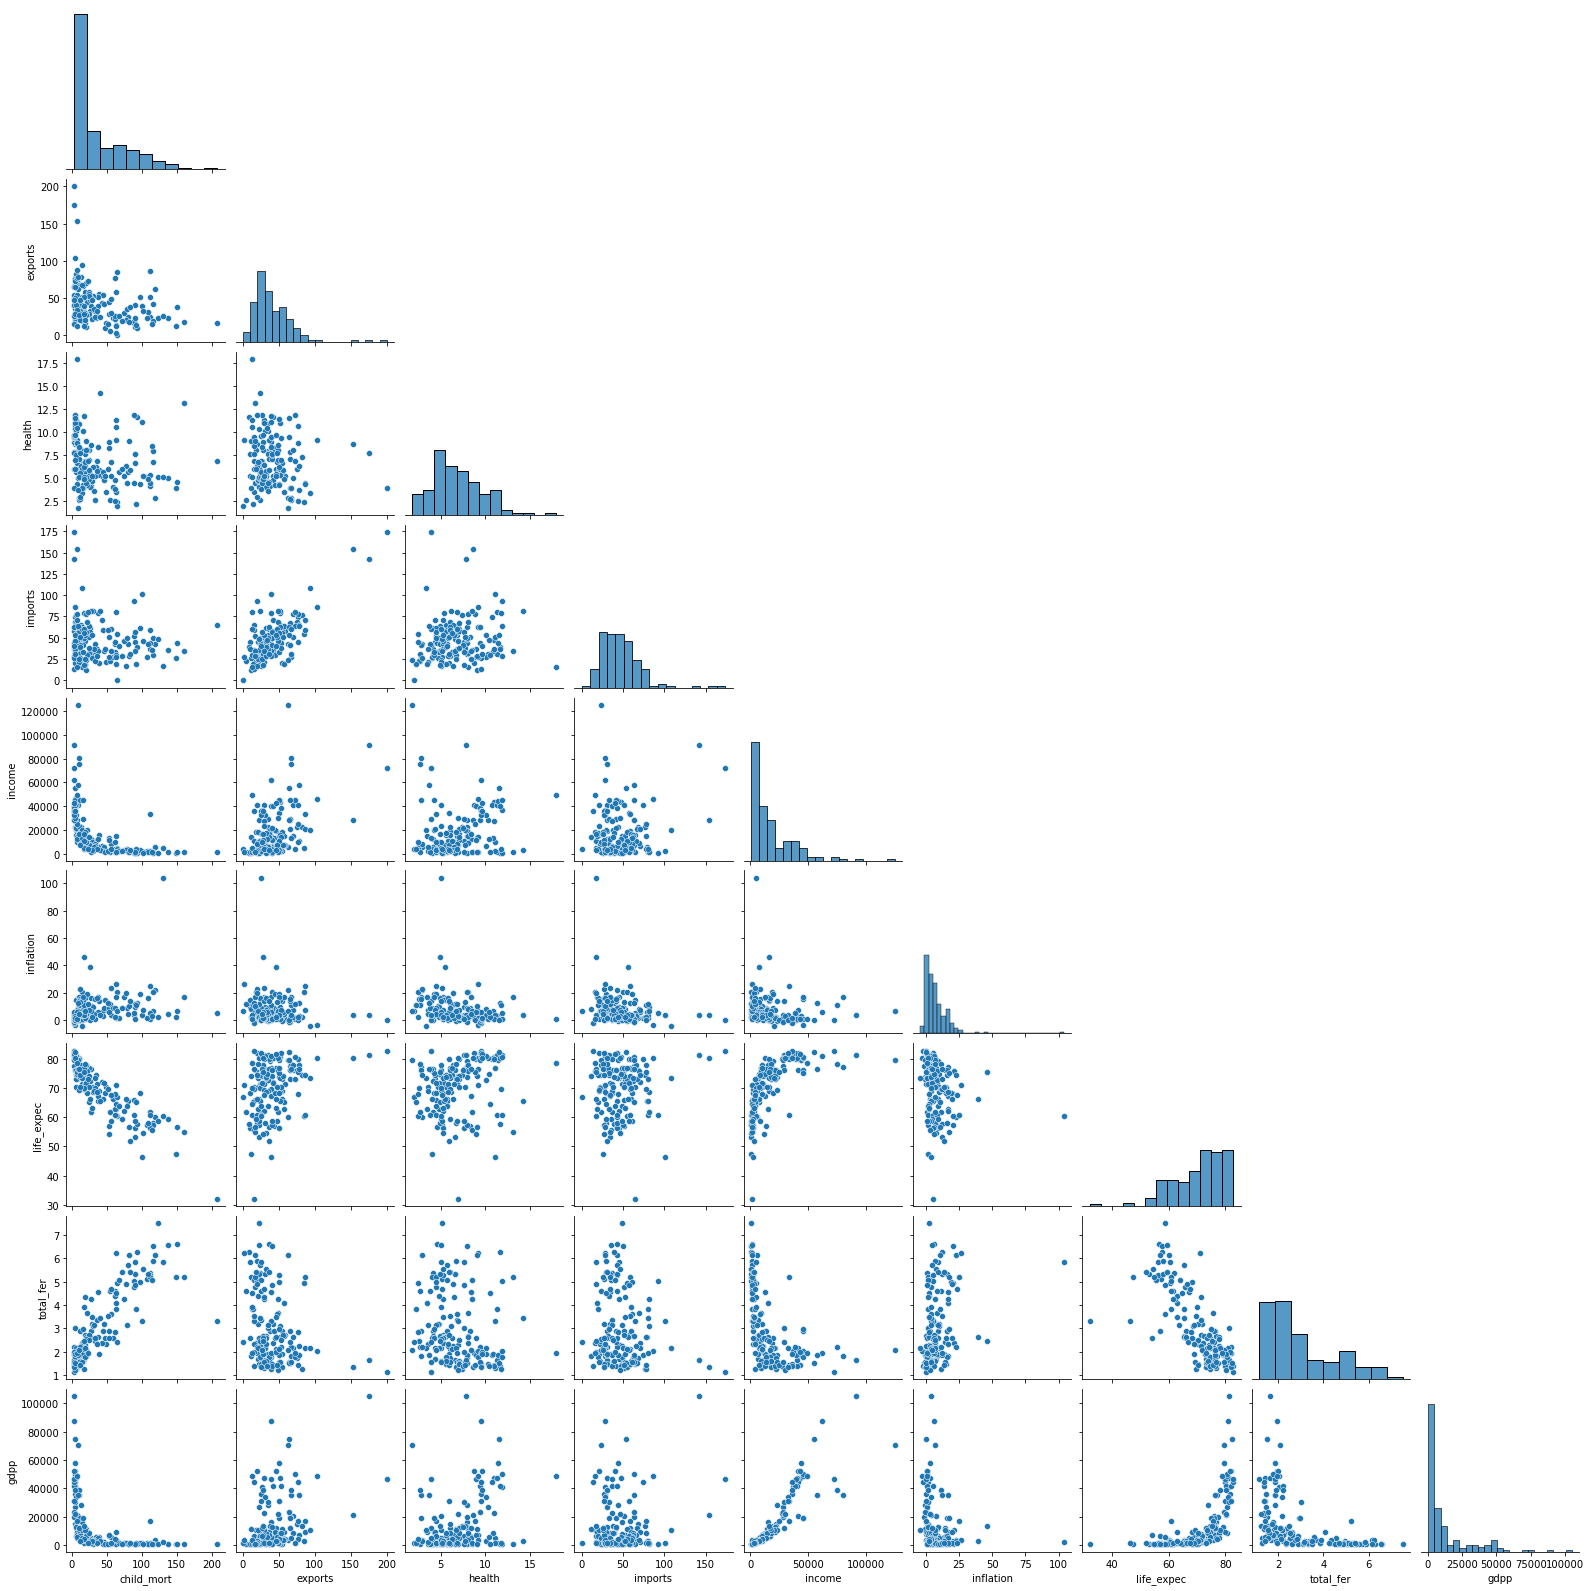

In [52]:
#income and life expectancy are strongly correlated with gdpp

sns.pairplot(df,corner=True)

In [53]:
df_sca = StandardScaler().fit_transform(df)

In [54]:
k = range(1,11)
ssd = []
for i in k:
    model = KMeans(n_clusters = i)
    model.fit(df)
    ssd.append(model.inertia_)

C:\Users\Delta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[117459687469.0782, 36528387934.322105, 21710210039.754147, 14610713446.535133, 10655378083.862547, 7655725089.094505, 5415400574.358981, 4258897193.751581, 3228565265.6980796, 2643637388.0110717]


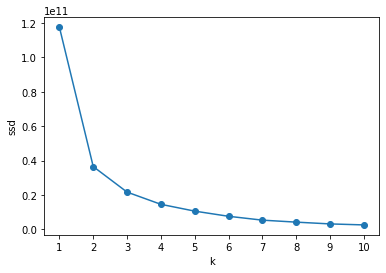

In [55]:
print(ssd)
plt.plot(k, ssd, marker='o')
plt.xlabel('k')
plt.ylabel('ssd')
plt.xticks(k)
plt.show()

In [56]:
model = KMeans(n_clusters= 3)
model.fit(df)

KMeans(n_clusters=3)

In [57]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [58]:
model.n_iter_

3

In [59]:
output=df
output['typesC']=model.labels_

In [60]:
output['country'] = xc
output

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,typesC,country
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Afghanistan
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Albania
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Algeria
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Angola
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Vanuatu
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Venezuela
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,Vietnam
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,Yemen


In [68]:

print(df[df['typesC']==1]['country'].count())
df[df['typesC']==1]['country']

7


23          Brunei
82          Kuwait
91      Luxembourg
114         Norway
123          Qatar
133      Singapore
145    Switzerland
Name: country, dtype: object

In [66]:

print(df[df['typesC']==0]['country'].count())
df[df['typesC']==0]['country']

128


0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 128, dtype: object

In [67]:

print(df[df['typesC']==2]['country'].count())
df[df['typesC']==2]['country']

32


7                 Australia
8                   Austria
10                  Bahamas
11                  Bahrain
15                  Belgium
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
49        Equatorial Guinea
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
98                    Malta
110             Netherlands
111             New Zealand
115                    Oman
122                Portugal
128            Saudi Arabia
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

In [72]:
df1 = output[["life_expec", 'income']]
k = range(1,11)
ssd = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(df1)
    ssd.append(model.inertia_)

C:\Users\Delta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


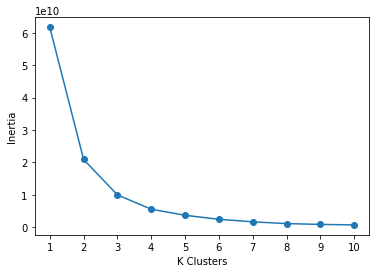

[61692899558.500465, 20892818429.745613, 9961123601.611004, 5551091622.431915, 3677205948.4023175, 2434957843.1280556, 1660703221.469617, 1108832512.795524, 857217171.180626, 702511948.5612335]


In [73]:
plt.plot(k,ssd, marker='o')
plt.xlabel('K Clusters')
plt.ylabel('Inertia')
plt.xticks(k)
plt.show()
print(ssd)

In [80]:
model=KMeans(n_clusters=3)
model.fit(df1)

KMeans(n_clusters=3)

[[7.99666667e+01 8.44833333e+04]
 [6.76138211e+01 7.91839837e+03]
 [7.85921053e+01 3.63763158e+04]]


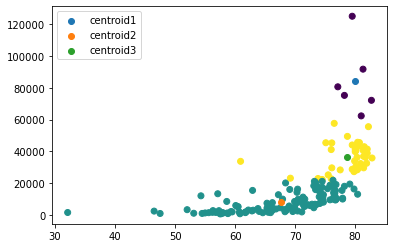

In [81]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,1] ,c=model.labels_)
centroid=model.cluster_centers_
print(centroid)
for i in range(len(centroid)):
    plt.scatter(centroid[i][0],centroid[i][1],label="centroid"+str(i+1))
plt.legend()